In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

In [2]:
from sklearn import datasets
from sklearn.mixture import GMM
from sklearn.cross_validation import StratifiedKFold

/Users/hknam/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
iris = datasets.load_iris()

In [4]:
indices = StratifiedKFold(iris.target, n_folds = 5)

In [5]:
train_index, test_index = next(iter(indices))

In [6]:
X_train = iris.data[train_index]
y_train = iris.target[train_index]

In [7]:
X_test = iris.data[test_index]
y_test = iris.target[test_index]

In [8]:
num_classes = len(np.unique(y_train))

In [9]:
classifier = GMM(n_components = num_classes, covariance_type = 'full',
                init_params = 'wc', n_iter = 20)

/Users/hknam/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)


In [10]:
classifier.means_ = np.array([X_train[y_train == i].mean(axis = 0)
                             for i in range(num_classes)])

In [11]:
classifier.fit(X_train)

/Users/hknam/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/hknam/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/hknam/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/hknam/anaconda3/lib/python3.6/site-package

GMM(covariance_type='full', init_params='wc', min_covar=0.001, n_components=3,
  n_init=1, n_iter=20, params='wmc', random_state=None, tol=0.001,
  verbose=0)

In [12]:
plt.figure()

In [13]:
colors = 'bgr'

In [14]:
for i, color in enumerate(colors):
    eigenvalues, eigenvectors = np.linalg.eigh(
            classifier._get_covars()[i][:2, :2])

    norm_vec = eigenvectors[0] / np.linalg.norm(eigenvectors[0])

    angle = np.arctan2(norm_vec[1], norm_vec[0])
    angle = 180 * angle / np.pi 

    scaling_factor = 8
    eigenvalues *= scaling_factor 

    ellipse = patches.Ellipse(classifier.means_[i, :2], 
            eigenvalues[0], eigenvalues[1], 180 + angle, 
            color=color)
    axis_handle = plt.subplot(1, 1, 1)
    ellipse.set_clip_box(axis_handle.bbox)
    ellipse.set_alpha(0.6)
    axis_handle.add_artist(ellipse)

/Users/hknam/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [15]:
colors = 'bgr'
for i, color in enumerate(colors):
    cur_data = iris.data[iris.target == i]
    plt.scatter(cur_data[:,0], cur_data[:,1], marker='o', 
            facecolors='none', edgecolors='black', s=40, 
            label=iris.target_names[i])

    test_data = X_test[y_test == i]
    plt.scatter(test_data[:,0], test_data[:,1], marker='s', 
            facecolors='black', edgecolors='black', s=40, 
            label=iris.target_names[i])


In [16]:
y_train_pred = classifier.predict(X_train)
accuracy_training = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
print('Accuracy on training data = ', accuracy_training)

Accuracy on training data =  87.5


/Users/hknam/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


In [17]:
y_test_pred = classifier.predict(X_test)
accuracy_testing = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
print('Accuracy on testing data = ', accuracy_testing)

Accuracy on testing data =  86.6666666667


/Users/hknam/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


In [18]:
plt.title('GMM classifier')
plt.xticks(())
plt.yticks(())

([], <a list of 0 Text yticklabel objects>)

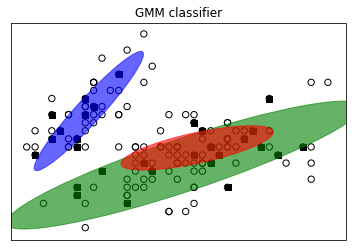

In [19]:
plt.show()